# Data Cleaning

In [82]:
import warnings
import pandas as pd
# Suppress FutureWarnings related to pandas.np
warnings.filterwarnings('ignore', category=FutureWarning)

In [83]:
ocd = pd.read_csv("raw_data/traits_/ocd_.tsv", sep='\t')
ptsd = pd.read_csv("raw_data/traits_/ptsd_.tsv", sep='\t')
anxiety = pd.read_csv("raw_data/traits_/anxiety_.tsv", sep='\t')
creativity = pd.read_csv("raw_data/traits_/creativity_.tsv", sep='\t')
intelligence = pd.read_csv("raw_data/traits_/intelligence_.tsv", sep='\t')

In [84]:
def clean(data, chr_id, chr_pos, p, beta):
    data = data.rename(columns={chr_id : 'CHR_ID', chr_pos : 'CHR_POS', p : 'P', beta : "BETA"})
    data = data[['CHR_ID', 'CHR_POS', 'P', "BETA", 'DISEASE/TRAIT', 'REPORTED GENE(S)']]   
    data[['CHR_ID', 'CHR_POS', 'P', "BETA"]] = data[['CHR_ID', 'CHR_POS', 'P', "BETA"]].apply(pd.to_numeric, errors='coerce')
    data = data.dropna(subset=['CHR_ID', 'CHR_POS', 'P', "BETA"])
    return data

In [85]:
ocd = clean(ocd, 'CHR_ID', 'CHR_POS', 'P-VALUE', 'OR or BETA')
intelligence = clean(intelligence, 'CHR_ID', 'CHR_POS', 'P-VALUE', 'OR or BETA')
anxiety = clean(anxiety, 'CHR_ID', 'CHR_POS', 'P-VALUE', 'OR or BETA')
creativity = clean(creativity, 'CHR_ID', 'CHR_POS', 'P-VALUE', 'OR or BETA')
ptsd = clean(ptsd, 'CHR_ID', 'CHR_POS', 'P-VALUE', 'OR or BETA')

# Beta Coefficient Distribution Analysis

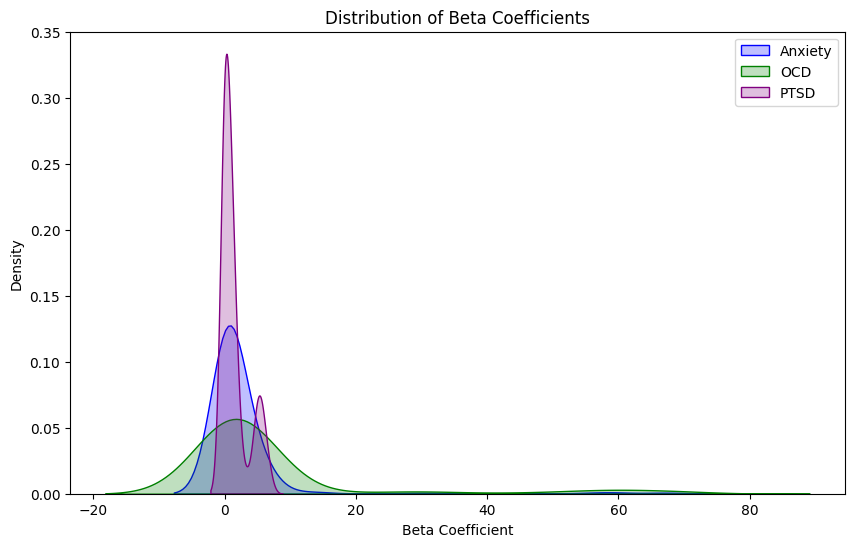

In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plot density plots for Beta coefficients
plt.figure(figsize=(10, 6))
sns.kdeplot(data=anxiety['BETA'], color='blue', label='Anxiety', fill=True)
sns.kdeplot(data=ocd['BETA'], color='green', label='OCD', fill=True)
sns.kdeplot(data=ptsd['BETA'], color='purple', label='PTSD', fill=True)
plt.xlabel('Beta Coefficient')
plt.ylabel('Density')
plt.title('Distribution of Beta Coefficients')
plt.legend()
plt.show()

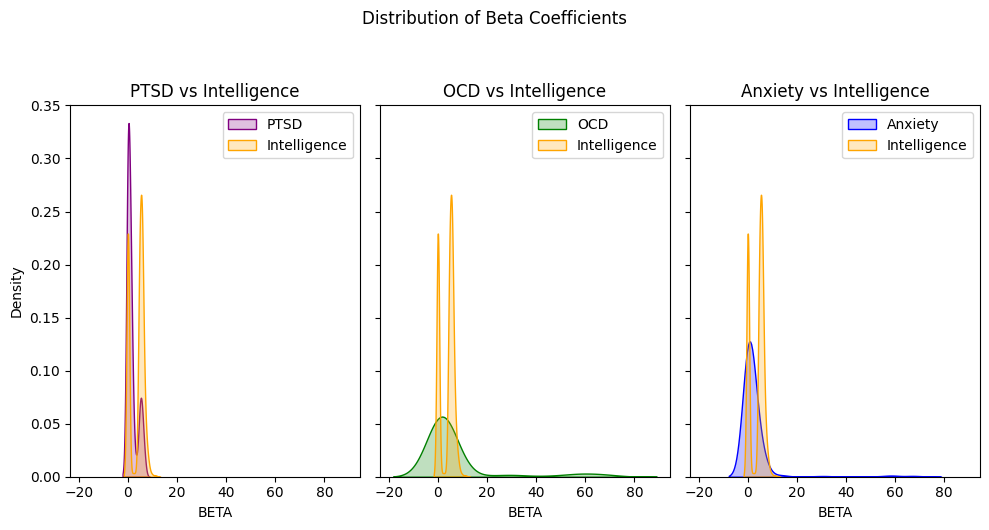

In [87]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5), sharex=True, sharey=True)

sns.kdeplot(data=ptsd['BETA'], color='purple', label='PTSD', ax=axes[0], fill=True)
sns.kdeplot(data=intelligence['BETA'], color='orange', label='Intelligence', ax=axes[0], fill=True)
axes[0].set_title('PTSD vs Intelligence')
axes[0].legend()

sns.kdeplot(data=ocd['BETA'], color='green', label='OCD', ax=axes[1], fill=True)
sns.kdeplot(data=intelligence['BETA'], color='orange', label='Intelligence', ax=axes[1], fill=True)
axes[1].set_title('OCD vs Intelligence')
axes[1].legend()

sns.kdeplot(data=anxiety['BETA'], color='blue', label='Anxiety', ax=axes[2], fill=True)
sns.kdeplot(data=intelligence['BETA'], color='orange', label='Intelligence', ax=axes[2], fill=True)
axes[2].set_title('Anxiety vs Intelligence')
axes[2].legend()

plt.suptitle('Distribution of Beta Coefficients', y=1.05)
plt.tight_layout()
plt.show()

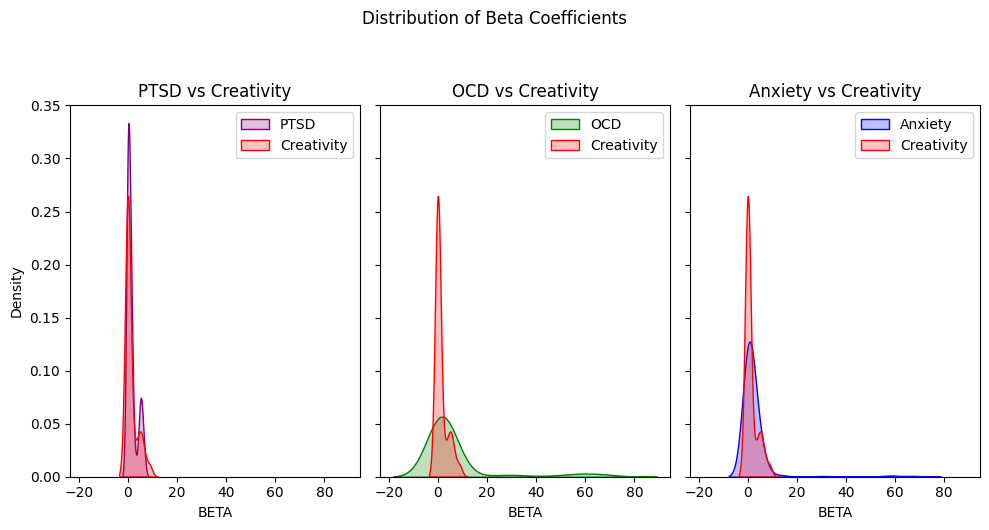

In [88]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5), sharex=True, sharey=True)

# Plot distribution for PTSD, Intelligence, and Creativity
sns.kdeplot(data=ptsd['BETA'], color='purple', label='PTSD', ax=axes[0], fill=True)
sns.kdeplot(data=creativity['BETA'], color='red', label='Creativity', ax=axes[0], fill=True)
axes[0].set_title('PTSD vs Creativity')
axes[0].legend()

# Plot distribution for OCD
sns.kdeplot(data=ocd['BETA'], color='green', label='OCD', ax=axes[1], fill=True)
sns.kdeplot(data=creativity['BETA'], color='red', label='Creativity', ax=axes[1], fill=True)
axes[1].set_title('OCD vs Creativity')
axes[1].legend()

# Plot distribution for Anxiety
sns.kdeplot(data=anxiety['BETA'], color='blue', label='Anxiety', ax=axes[2], fill=True)
sns.kdeplot(data=creativity['BETA'], color='red', label='Creativity', ax=axes[2], fill=True)
axes[2].set_title('Anxiety vs Creativity')
axes[2].legend()

plt.suptitle('Distribution of Beta Coefficients', y=1.05)
plt.tight_layout()
plt.show()

# Manhattan Plots

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline

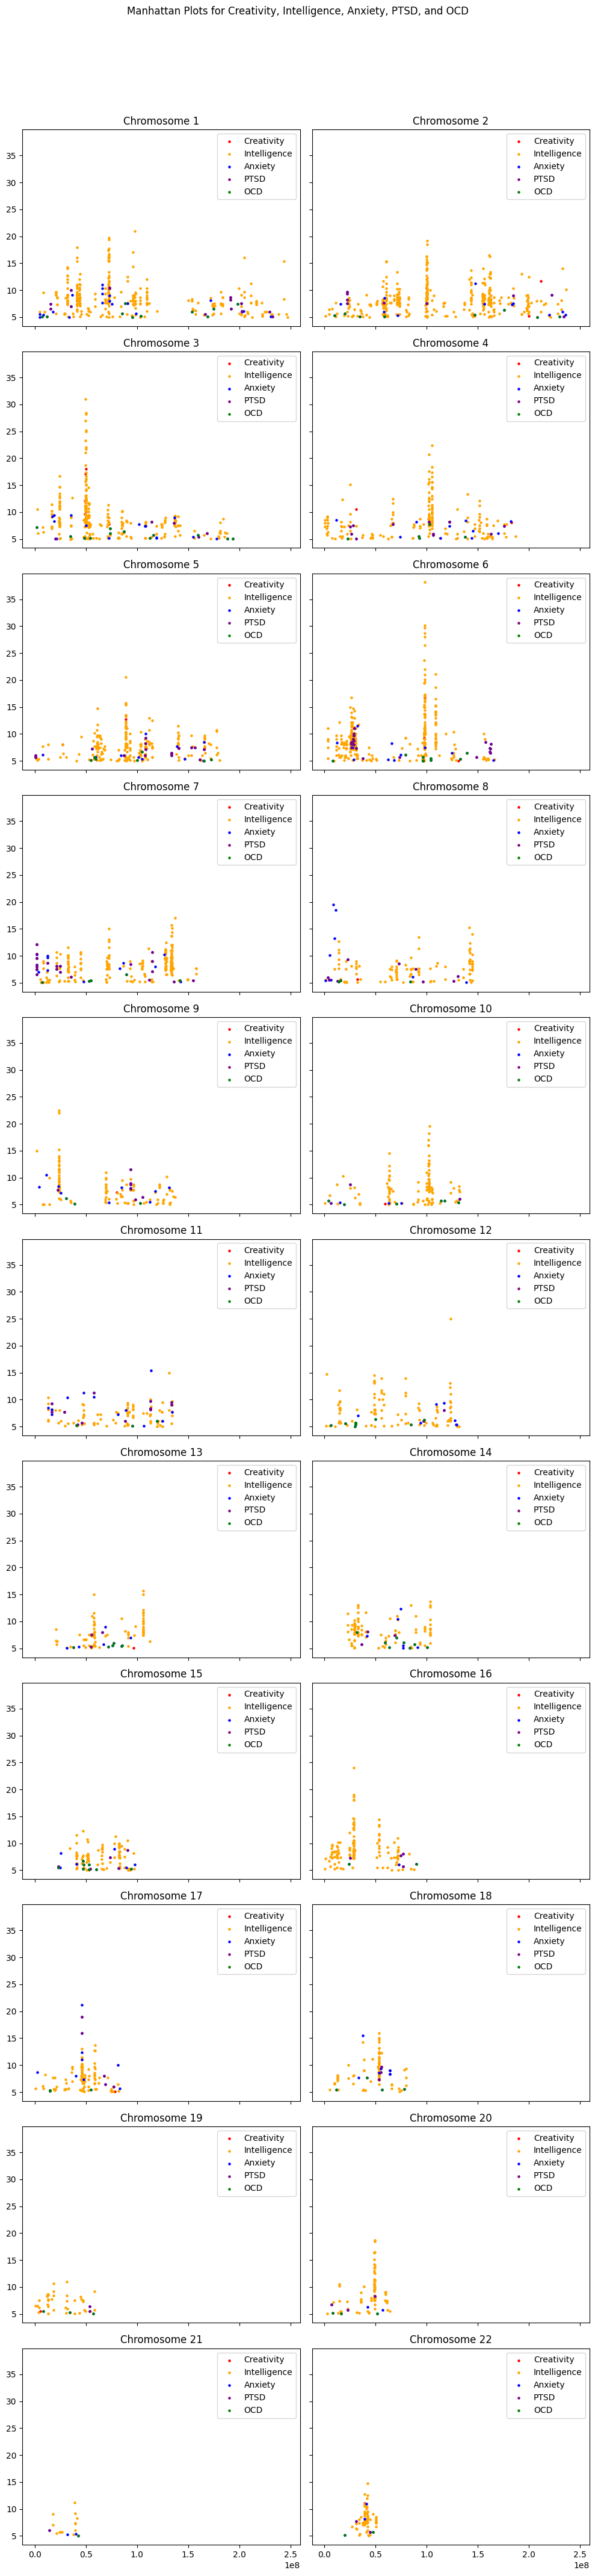

In [90]:
# Convert CHR_ID to integer
creativity['CHR_ID'] = creativity['CHR_ID'].astype(int)
intelligence['CHR_ID'] = intelligence['CHR_ID'].astype(int)
anxiety['CHR_ID'] = anxiety['CHR_ID'].astype(int)
ptsd['CHR_ID'] = ptsd['CHR_ID'].astype(int)
ocd['CHR_ID'] = ocd['CHR_ID'].astype(int)

# Define the number of rows and columns for subplots
num_rows = 11  # Number of rows
num_cols = 2   # Number of columns

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 45), sharex=True, sharey=True)

# Loop over each chromosome
for i in range(1, 23):
    # Filter data for the current chromosome
    creativity_chr = creativity[creativity['CHR_ID'] == i]
    intelligence_chr = intelligence[intelligence['CHR_ID'] == i]
    anxiety_chr = anxiety[anxiety['CHR_ID'] == i]
    ptsd_chr = ptsd[ptsd['CHR_ID'] == i]
    ocd_chr = ocd[ocd['CHR_ID'] == i]
    
    # Compute the row and column index for the subplot
    row_index = (i - 1) // num_cols
    col_index = (i - 1) % num_cols
    
    # Plot Manhattan plot for Creativity
    axes[row_index, col_index].scatter(creativity_chr['CHR_POS'], -pd.np.log10(creativity_chr['P']), color='red', label='Creativity', s=5)
    
    # Plot Manhattan plot for Intelligence
    axes[row_index, col_index].scatter(intelligence_chr['CHR_POS'], -pd.np.log10(intelligence_chr['P']), color='orange', label='Intelligence', s=5)
    
    # Plot Manhattan plot for Anxiety
    axes[row_index, col_index].scatter(anxiety_chr['CHR_POS'], -pd.np.log10(anxiety_chr['P']), color='blue', label='Anxiety', s=5)
    
    # Plot Manhattan plot for PTSD
    axes[row_index, col_index].scatter(ptsd_chr['CHR_POS'], -pd.np.log10(ptsd_chr['P']), color='purple', label='PTSD', s=5)
    
    # Plot Manhattan plot for OCD
    axes[row_index, col_index].scatter(ocd_chr['CHR_POS'], -pd.np.log10(ocd_chr['P']), color='green', label='OCD', s=5)
    
    # Set title for the subplot
    axes[row_index, col_index].set_title(f'Chromosome {i}')

# Add legend to each subplot
for ax_row in axes:
    for ax in ax_row:
        ax.legend()

# Set title for the entire figure
fig.suptitle('Manhattan Plots for Creativity, Intelligence, Anxiety, PTSD, and OCD')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()


# Shared Genes Among Traits and Disorders

In [91]:
import pandas as pd

traits = [creativity, intelligence]
disorders = [anxiety, ocd, ptsd]

trait_names = {0: 'Creativity', 1: 'Intelligence'}
disorder_names = {0: 'Anxiety', 1: 'OCD', 2: 'PTSD'}

# Initialize a 2D array to store the counts
counts = []

# Loop through traits and disorders to calculate the counts
for i, trait in enumerate(traits):
    trait_counts = []
    for j, disorder in enumerate(disorders):
        # Merge the trait and disorder dataframes on CHR_ID and CHR_POS
        merged_df = pd.merge(trait, disorder, on=['CHR_ID', 'CHR_POS'], how='inner')
        # Append the count of associated genes to the counts list
        trait_counts.append(len(merged_df))
    # Append the counts for the current trait to the counts list
    counts.append(trait_counts)

# Create a DataFrame from the counts
df = pd.DataFrame(counts, columns=[disorder_names[j] for j in range(len(disorders))], index=[trait_names[i] for i in range(len(traits))])

df

,Anxiety,OCD,PTSD
Creativity,0,0,0
Intelligence,9,0,9


In [92]:
intelligence_anxiety = pd.merge(anxiety, intelligence, on=['CHR_ID', 'CHR_POS'], how='inner')
intelligence_anxiety

,CHR_ID,CHR_POS,P_x,BETA_x,DISEASE/TRAIT_x,REPORTED GENE(S)_x,P_y,BETA_y,DISEASE/TRAIT_y,REPORTED GENE(S)_y
0,4,25407216.0,5.000000e-08,0.013091,Post-traumatic stress disorder (mental health ...,NaN,2.000000e-10,0.023439,Intelligence (MTAG),ANAPC4
1,4,25407216.0,5.000000e-08,0.013091,Post-traumatic stress disorder (mental health ...,NaN,7.000000e-16,8.068000,Intelligence,NR
2,4,25407216.0,5.000000e-08,0.013091,Post-traumatic stress disorder (mental health ...,NaN,7.000000e-09,5.797000,General cognitive ability,ANAPC4
3,4,102267552.0,6.000000e-09,0.022836,Post-traumatic stress disorder (MTAG),NaN,3.000000e-18,0.050441,Intelligence (MTAG),SLC39A8
4,4,102267552.0,6.000000e-09,0.022836,Post-traumatic stress disorder (MTAG),NaN,2.000000e-21,9.494000,Intelligence,NR
5,4,102267552.0,6.000000e-09,0.022836,Post-traumatic stress disorder (MTAG),NaN,8.000000e-17,8.327000,General cognitive ability,SLC39A8
6,6,28744470.0,1.000000e-08,0.017133,Post-traumatic stress disorder (MTAG),NaN,1.000000e-09,6.098000,Intelligence,NR
7,6,28744470.0,1.000000e-08,0.017133,Post-traumatic stress disorder (MTAG),NaN,5.000000e-12,6.899000,General cognitive ability,RPSAP2
8,6,26466164.0,3.000000e-08,0.014036,Post-traumatic stress disorder (MTAG),NaN,3.000000e-08,5.572000,General cognitive ability,BTN2A1


In [93]:
intelligence_ptsd = pd.merge(ptsd, intelligence, on=['CHR_ID', 'CHR_POS'], how='inner')
intelligence_ptsd

,CHR_ID,CHR_POS,P_x,BETA_x,DISEASE/TRAIT_x,REPORTED GENE(S)_x,P_y,BETA_y,DISEASE/TRAIT_y,REPORTED GENE(S)_y
0,4,25407216.0,5.000000e-08,0.013091,Post-traumatic stress disorder (mental health ...,NaN,2.000000e-10,0.023439,Intelligence (MTAG),ANAPC4
1,4,25407216.0,5.000000e-08,0.013091,Post-traumatic stress disorder (mental health ...,NaN,7.000000e-16,8.068000,Intelligence,NR
2,4,25407216.0,5.000000e-08,0.013091,Post-traumatic stress disorder (mental health ...,NaN,7.000000e-09,5.797000,General cognitive ability,ANAPC4
3,4,102267552.0,6.000000e-09,0.022836,Post-traumatic stress disorder (MTAG),NaN,3.000000e-18,0.050441,Intelligence (MTAG),SLC39A8
4,4,102267552.0,6.000000e-09,0.022836,Post-traumatic stress disorder (MTAG),NaN,2.000000e-21,9.494000,Intelligence,NR
5,4,102267552.0,6.000000e-09,0.022836,Post-traumatic stress disorder (MTAG),NaN,8.000000e-17,8.327000,General cognitive ability,SLC39A8
6,6,28744470.0,1.000000e-08,0.017133,Post-traumatic stress disorder (MTAG),NaN,1.000000e-09,6.098000,Intelligence,NR
7,6,28744470.0,1.000000e-08,0.017133,Post-traumatic stress disorder (MTAG),NaN,5.000000e-12,6.899000,General cognitive ability,RPSAP2
8,6,26466164.0,3.000000e-08,0.014036,Post-traumatic stress disorder (MTAG),NaN,3.000000e-08,5.572000,General cognitive ability,BTN2A1
